In [1]:
library(Seurat)
library(stringr)
library(ggplot2)
library(dplyr)
library(purrr)
library(ggplot2)
library(pheatmap)
library(ComplexHeatmap)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effo

# hypoxia & normxia

In [2]:
raw_data = read.csv('~/HPV/data/spatial/gene_to_cell.csv')

In [3]:
head(raw_data)

,cell,AICDA,CCL3,CD4,CD8A,CXCL13,E5,E6,E7,ENTPD1,⋯,IGHA1,IGHG1,KRT5,MKI67,MS4A1,MZB1,PDCD1,TCF7,TNFRSF4,XCL1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,"(0.85, 1124.04)",0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
2,"(1.15, 1496.38)",0,0,0,0,1,0,0,0,0,⋯,1,2,0,0,0,0,0,0,0,0
3,"(1.50, 1436.75)",0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
4,"(1.85, 1084.11)",0,0,0,0,0,0,0,0,0,⋯,0,2,0,0,0,0,0,0,0,0
5,"(1.96, 1349.41)",0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
6,"(10.09, 2755.12)",0,0,0,0,0,0,0,0,0,⋯,0,0,2,0,0,0,0,0,0,0


In [4]:
raw_data = raw_data[-nrow(raw_data),]
loc = raw_data[,1]
loc = gsub('[()]','',loc)
loc[1:5]

[1] "0.85, 1124.04" "1.15, 1496.38" "1.50, 1436.75" "1.85, 1084.11"
[5] "1.96, 1349.41"

In [5]:
x = as.numeric(unlist(lapply(loc,function(x){
    unlist(str_split(x,', '))[1]
})))
y = as.numeric(unlist(lapply(loc,function(x){
    unlist(str_split(x,', '))[2]
})))

In [6]:
head(raw_data)

,cell,AICDA,CCL3,CD4,CD8A,CXCL13,E5,E6,E7,ENTPD1,⋯,IGHA1,IGHG1,KRT5,MKI67,MS4A1,MZB1,PDCD1,TCF7,TNFRSF4,XCL1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,"(0.85, 1124.04)",0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
2,"(1.15, 1496.38)",0,0,0,0,1,0,0,0,0,⋯,1,2,0,0,0,0,0,0,0,0
3,"(1.50, 1436.75)",0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
4,"(1.85, 1084.11)",0,0,0,0,0,0,0,0,0,⋯,0,2,0,0,0,0,0,0,0,0
5,"(1.96, 1349.41)",0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
6,"(10.09, 2755.12)",0,0,0,0,0,0,0,0,0,⋯,0,0,2,0,0,0,0,0,0,0


In [7]:
raw_data = raw_data[,-1]
raw_data = t(raw_data)
raw_data = as.data.frame(raw_data)
colnames(raw_data) = paste0('c',1:ncol(raw_data))

In [8]:
head(raw_data)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,⋯,c43230,c43231,c43232,c43233,c43234,c43235,c43236,c43237,c43238,c43239
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AICDA,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CCL3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CD4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CD8A,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CXCL13,0,1,0,0,0,0,0,0,0,2,⋯,0,0,0,0,0,0,0,0,1,0
E5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


In [9]:
spatial <- CreateSeuratObject(counts = raw_data, assay = "RNA")
coords = data.frame(x = x, y = y, cell = colnames(spatial))
cents <- CreateCentroids(coords)
segmentations.data <- list(
    "centroids" = cents
)
coords <- CreateFOV(
    coords = segmentations.data,
    type = "centroids",
    molecules = NULL,
    assay = "RNA"
  )
spatial[["p2s2"]] <- coords

Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”


In [10]:
mat = as.data.frame(spatial@assays$RNA@layers$counts)

In [11]:
rownames(mat) = rownames(spatial)

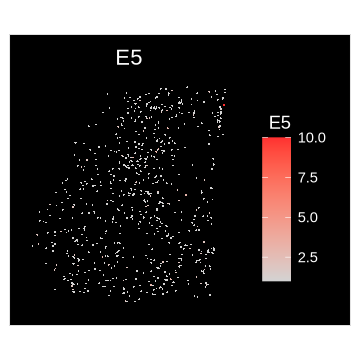

In [12]:
options(repr.plot.width = 3, repr.plot.height = 3)
# suppressWarnings(ImageFeaturePlot(spatial, features = "E6",size = 1,dark.background = FALSE))
suppressWarnings(ImageFeaturePlot(spatial[,mat['E5',] > 0 & mat['KRT5',] > 0], features = "E5"))

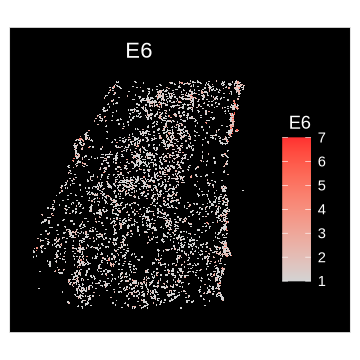

In [13]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['E6',] > 0 & mat['KRT5',] > 0], features = "E6"))

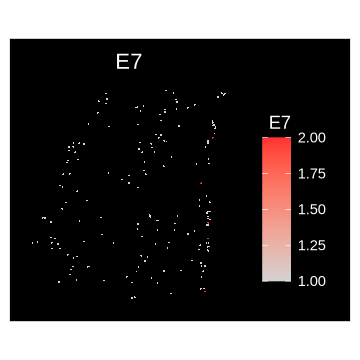

In [14]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['E7',] > 0 & mat['KRT5',] > 0], features = "E7"))

In [15]:
sum(mat['ERO1A',] >0 & mat['KRT5',] > 0 & mat['MKI67',] ==0)

[1] 187

In [16]:
sum(mat['ERO1A',] == 0 & mat['KRT5',] > 0 & mat['MKI67',] > 0)

[1] 2049

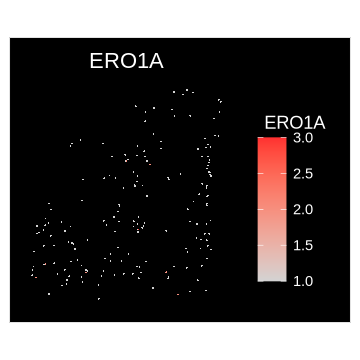

In [17]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['ERO1A',] >0 & mat['KRT5',] > 0 & mat['MKI67',] ==0], features = "ERO1A"))

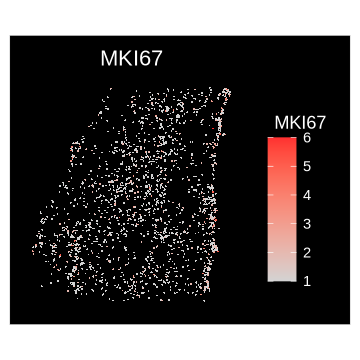

In [18]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['ERO1A',] == 0 & mat['KRT5',] > 0 & mat['MKI67',] > 0], features = "MKI67"))

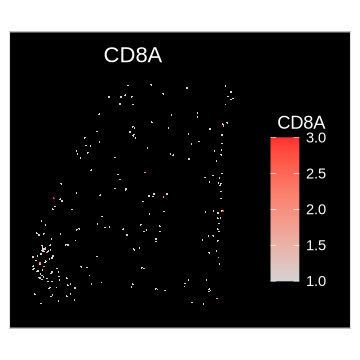

In [19]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['CD8A',] > 0], features = "CD8A"))

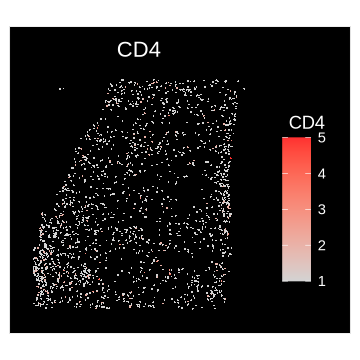

In [20]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['CD4',] > 0], features = "CD4"))

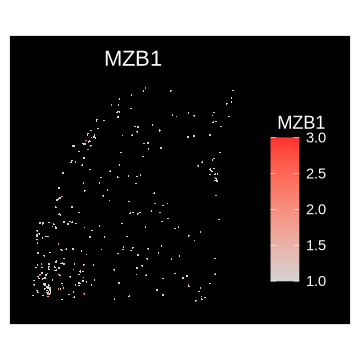

In [21]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['MZB1',] > 0], features = "MZB1"))

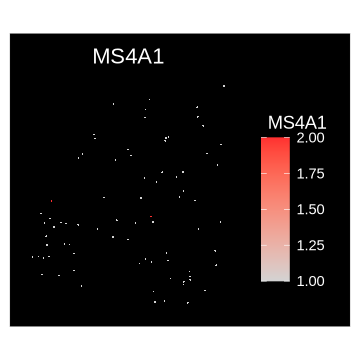

In [22]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['MS4A1',] > 0], features = "MS4A1"))

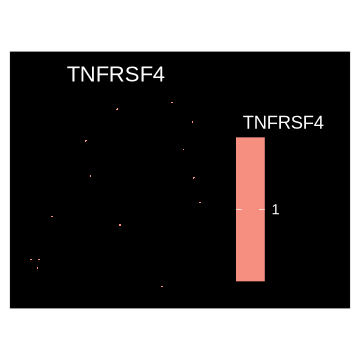

In [23]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['CD4',] > 0 & mat['TNFRSF4',] > 0], features = "TNFRSF4"))

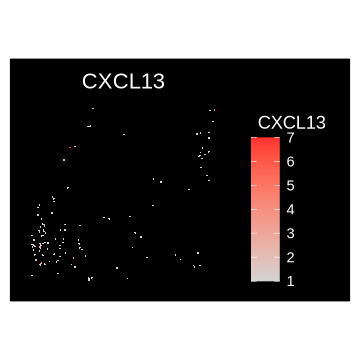

In [24]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['CD4',] > 0 & mat['CXCL13',] > 0], features = "CXCL13"))

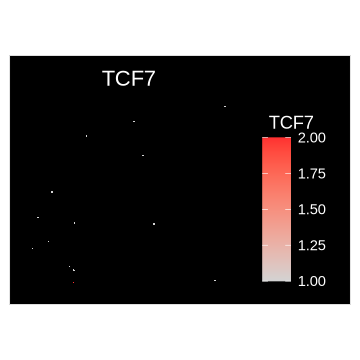

In [25]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['CD8A',] > 0 & mat['TCF7',] > 0], features = "TCF7"))

In [26]:
# suppressWarnings(ImageFeaturePlot(spatial[,mat['CD8A',] > 0 & mat['ENTPD1',] > 0], features = "ENTPD1"))
# No cells found

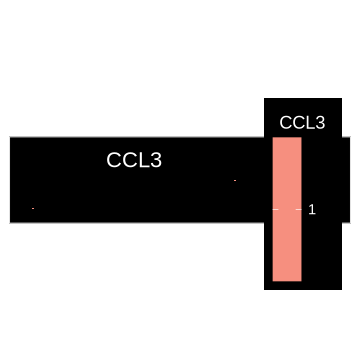

In [27]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['CD8A',] > 0 & mat['CCL3',] > 0], features = "CCL3"))

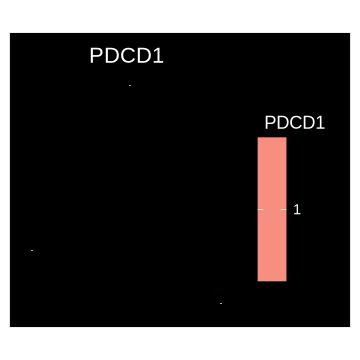

In [28]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['CD8A',] > 0 & mat['PDCD1',] > 0], features = "PDCD1"))

In [29]:
#No cells found
#suppressWarnings(ImageFeaturePlot(spatial[,mat['CD8A',] > 0 & mat['XCL1',] > 0], features = "XCL1"))

In [30]:
#No cells found
#suppressWarnings(ImageFeaturePlot(spatial[,mat['MS4A1',] > 0 & mat['AICDA',] > 0], features = "AICDA"))

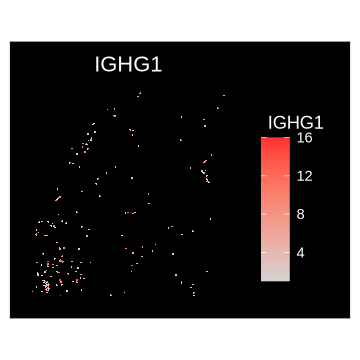

In [31]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['MZB1',] > 0 & mat['IGHG1',] > 0], features = "IGHG1"))

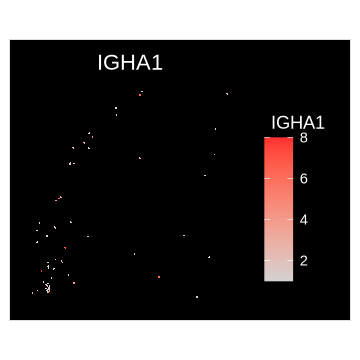

In [32]:
suppressWarnings(ImageFeaturePlot(spatial[,mat['MZB1',] > 0 & mat['IGHA1',] > 0], features = "IGHA1"))

In [33]:
rownames(spatial)

[1] "AICDA"   "CCL3"    "CD4"     "CD8A"    "CXCL13"  "E5"      "E6"     
 [8] "E7"      "ENTPD1"  "ERO1A"   "IGHA1"   "IGHG1"   "KRT5"    "MKI67"  
[15] "MS4A1"   "MZB1"    "PDCD1"   "TCF7"    "TNFRSF4" "XCL1"

In [34]:
spatial$major = 'cts'
spatial$major[mat['CD8A',]>0] = 'CD8T'
spatial$major[mat['CD4',]>0 & mat['CXCL13',]>0] = 'Tfh'
spatial$major[mat['MS4A1',]>0] = 'B'
spatial$major[mat['MZB1',]>0] = 'Plasma'
spatial$major[mat['ERO1A',] == 0 & mat['KRT5',] > 0 & mat['MKI67',] > 0] = 'Epi_Normoxia'
spatial$major[mat['ERO1A',] > 0 & mat['KRT5',] > 0 & mat['MKI67',] == 0] = 'Epi_Hypoxia'

In [35]:
Idents(spatial) = 'major'

In [36]:
dim(spatial)

[1]    20 43239

In [37]:
spatial <- BuildNicheAssay(object = spatial[,spatial$major!='cts'], group.by = "major",
    niches.k = 2, neighbors.k = 30, fov = 'p2s2')

Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Computing nearest neighbor graph

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix



In [38]:
dim(spatial@assays$niche)

[1]    6 2919

In [39]:
neigbor_mat = as.data.frame(spatial@assays$niche@counts)

In [40]:
head(neigbor_mat)

,c16,c17,c33,c58,c76,c93,c103,c114,c117,c128,⋯,c43113,c43149,c43158,c43165,c43178,c43186,c43215,c43220,c43224,c43238
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B,1,1,2,1,0,1,1,3,0,2,⋯,2,1,0,0,0,2,0,3,2,1
CD8T,3,3,4,2,2,3,3,12,0,0,⋯,4,3,0,1,0,0,0,11,7,0
Epi-Hypoxia,2,1,3,1,1,3,3,0,0,0,⋯,2,2,0,0,4,0,5,0,1,0
Epi-Normoxia,21,20,15,17,22,19,22,3,28,25,⋯,14,23,13,15,23,24,23,4,9,19
Plasma,3,4,5,7,4,3,1,5,2,3,⋯,5,1,12,12,3,4,2,5,4,8
Tfh,0,1,1,2,1,1,0,7,0,0,⋯,3,0,5,2,0,0,0,7,7,2


In [41]:
ht = Heatmap(neigbor_mat,show_column_names = FALSE,show_row_names = FALSE,column_split = 2,clustering_method_columns = 'ward.D2')

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


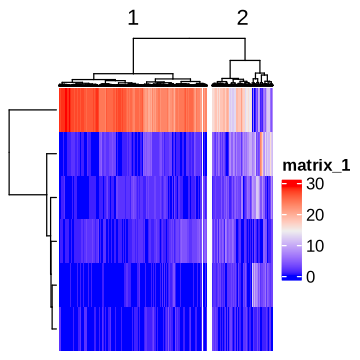

In [42]:
ht = draw(ht)

In [43]:
spatial$niches[column_order(ht)[[2]]] = 'IA'
spatial$niches[column_order(ht)[[1]]] = 'IS'

In [44]:
niche.plot <- ImageDimPlot(spatial, group.by = "niches", size = 1.5, dark.background = F) +
    scale_fill_manual(values = c("#442288", "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"))

Warning message:
“No FOV associated with assay 'niche', using global default FOV”


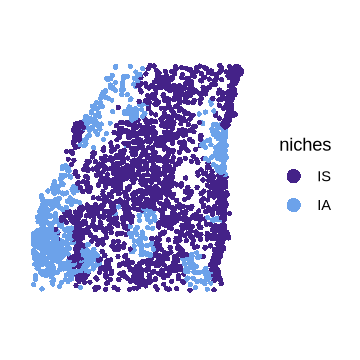

In [45]:
niche.plot

In [46]:
table(spatial$major[spatial$niches=='IA'])


           B         CD8T  Epi_Hypoxia Epi_Normoxia       Plasma          Tfh 
          35          118           66          348          199           83 

In [47]:
table(spatial$major[spatial$niches=='IS'])


           B         CD8T  Epi_Hypoxia Epi_Normoxia       Plasma          Tfh 
          38           80          121         1701          105           25 

In [48]:
table(spatial$major[spatial$niches=='IA'])/table(spatial$major)


           B         CD8T  Epi_Hypoxia Epi_Normoxia       Plasma          Tfh 
   0.4794521    0.5959596    0.3529412    0.1698389    0.6546053    0.7685185 

In [49]:
table(spatial$major[spatial$niches=='IS'])/table(spatial$major)


           B         CD8T  Epi_Hypoxia Epi_Normoxia       Plasma          Tfh 
   0.5205479    0.4040404    0.6470588    0.8301611    0.3453947    0.2314815 

In [50]:
table(spatial$major[spatial$niches=='IA'])/sum(spatial$niches=='IA')


           B         CD8T  Epi_Hypoxia Epi_Normoxia       Plasma          Tfh 
  0.04122497   0.13898704   0.07773852   0.40989399   0.23439340   0.09776207 

In [51]:
table(spatial$major[spatial$niches=='IS'])/sum(spatial$niches=='IS')


           B         CD8T  Epi_Hypoxia Epi_Normoxia       Plasma          Tfh 
  0.01835749   0.03864734   0.05845411   0.82173913   0.05072464   0.01207729 

In [52]:
percent1 = table(spatial$major[spatial$niches=='IA'])/sum(spatial$niches=='IA')

In [53]:
percent2 = table(spatial$major[spatial$niches=='IS'])/sum(spatial$niches=='IS')

In [54]:
percent1 = percent1[c('Tfh','CD8T','B','Plasma')]
percent2 = percent2[c('Tfh','CD8T','B','Plasma')]

In [55]:
percent = data.frame(percentage = c(as.vector(percent1),as.vector(percent2)), immune_ct = rep(c('Tfh','CD8T','B','Plasma'),2), module = rep(c('IA','IS'),each = 4))

In [56]:
percent

percentage,immune_ct,module
<dbl>,<chr>,<chr>
0.09776207,Tfh,IA
0.13898704,CD8T,IA
0.04122497,B,IA
0.23439340,Plasma,IA
0.01207729,Tfh,IS
0.03864734,CD8T,IS
0.01835749,B,IS
0.05072464,Plasma,IS


In [57]:
saveRDS(percent,file = '~/HPV/res/spatial/percent.rds')

In [58]:
res = data.frame(m2 = c(66,121), m1 = c(348,1701))

In [59]:
rownames(res) = c('IA','IS')

In [60]:
fisher.test(res)


	Fisher's Exact Test for Count Data

data:  res
p-value = 1.069e-08
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.900660 3.712145
sample estimates:
odds ratio 
  2.664638 


In [61]:
res

,m2,m1
,<dbl>,<dbl>
IA,66,348
IS,121,1701


In [62]:
saveRDS(res,file = '~/HPV/res/spatial/fisher.rds')

In [63]:
ncol(spatial)

[1] 2919

In [64]:
spatial$major = factor(spatial$major,levels = c('Epi_Normoxia','Epi_Hypoxia','Tfh','CD8T','B','Plasma'))

Warning message:
“No FOV associated with assay 'niche', using global default FOV”


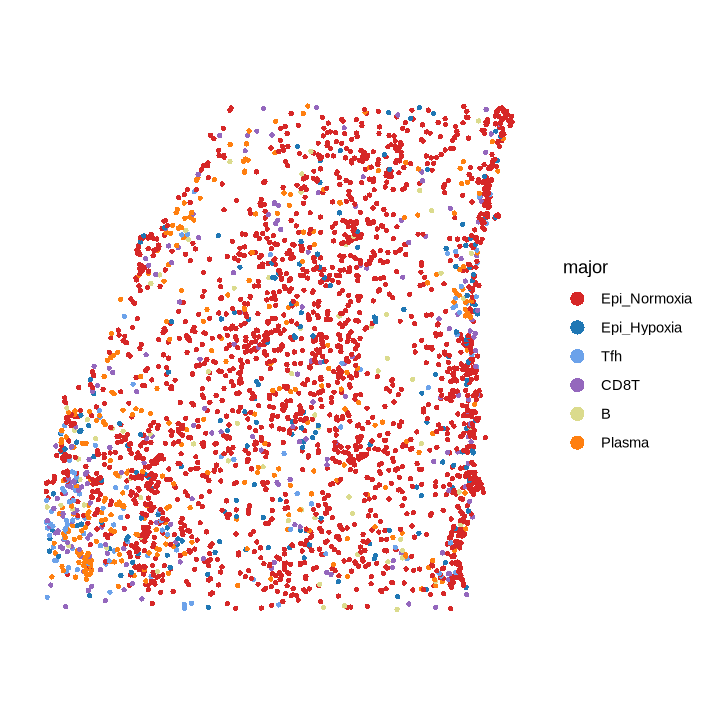

In [65]:
options(repr.plot.width = 6, repr.plot.height = 6)
ImageDimPlot(spatial, group.by = "major", size = 1.5, dark.background = F) + scale_fill_manual(values = c("#D62727", "#1F77B4", "#6CA2EA", "#9467BD", "#DBDB8D", '#FF7F0F'))

Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”


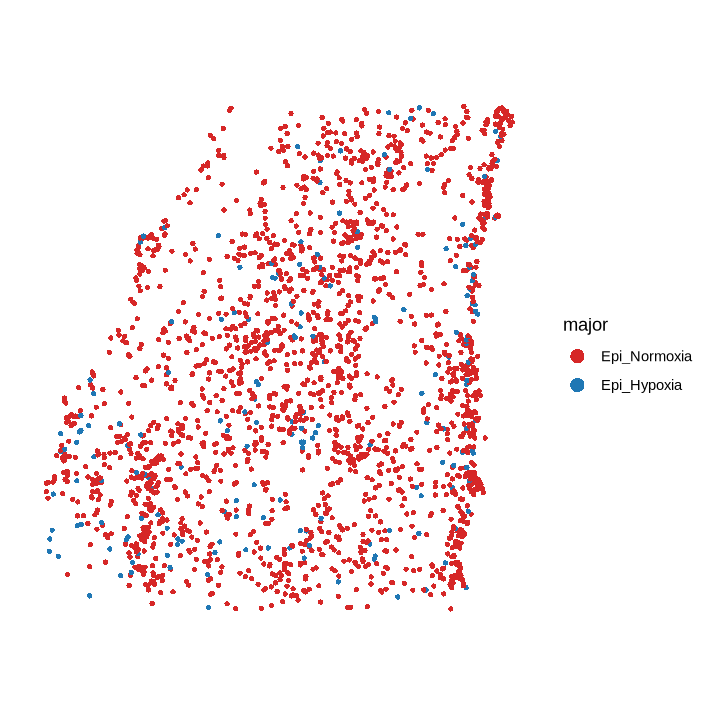

In [66]:
options(repr.plot.width = 6, repr.plot.height = 6)
ImageDimPlot(spatial[,spatial$major %in% c('Epi_Normoxia','Epi_Hypoxia')], group.by = "major", size = 1.5, dark.background = F) + scale_fill_manual(values = c("#D62727", "#1F77B4", "#6CA2EA", "#9467BD", "#DBDB8D", '#FF7F0F'))

In [67]:
DefaultAssay(spatial) = 'RNA'
saveRDS(spatial,file = '~/HPV/res/seurat_rds/spatial.rds')

In [68]:
loc = GetTissueCoordinates(spatial)

In [69]:
loc$ct = spatial$major

In [70]:
head(loc)

,x,y,cell,ct
,<dbl>,<dbl>,<chr>,<fct>
1,10.98,4026.52,c16,Epi_Normoxia
2,100.15,1215.44,c17,CD8T
3,1001.71,2473.53,c33,Epi_Hypoxia
4,1004.23,817.88,c58,Epi_Normoxia
5,1006.02,1539.46,c76,Epi_Normoxia
6,1007.50,2401.42,c93,Epi_Normoxia


In [71]:
epithelial <- subset(loc, ct %in% c('Epi_Normoxia','Epi_Hypoxia'))
immune <- subset(loc, !(ct %in% c('Epi_Normoxia','Epi_Hypoxia')))

In [72]:
dim(epithelial)

[1] 2236    4

In [73]:
dim(immune)

[1] 683   4

In [76]:
distances = readRDS('~/HPV/res/spatial/distances.rds')

In [77]:
dim(distances)

[1] 2236  683

In [78]:
distance_immune = list()

In [79]:
unique(spatial$major)

[1] Epi_Normoxia CD8T         Epi_Hypoxia  Plasma       B           
[6] Tfh         
Levels: Epi_Normoxia Epi_Hypoxia Tfh CD8T B Plasma

In [80]:
for (ct in c('Tfh','CD8T','Plasma','B')){
    sub_mat = distances[,colnames(distances) == ct]
    distance_immune[[ct]] = apply(sub_mat,1,function(x){
        x = sort(x,decreasing = FALSE)
        x = mean(x[1:3])
    })
}

In [81]:
distance_immune = data.frame(distance = unlist(distance_immune), immune_ct = rep(c('Tfh','CD8T','Plasma','B'),each = 2236), epi_ct = rep(epithelial$ct,4))

In [82]:
head(distance_immune)

,distance,immune_ct,epi_ct
,<dbl>,<chr>,<fct>
1,326.2990,Tfh,Epi_Normoxia
2,244.9707,Tfh,Epi_Hypoxia
3,153.2412,Tfh,Epi_Normoxia
4,250.8095,Tfh,Epi_Normoxia
5,303.7637,Tfh,Epi_Normoxia
6,598.4452,Tfh,Epi_Normoxia


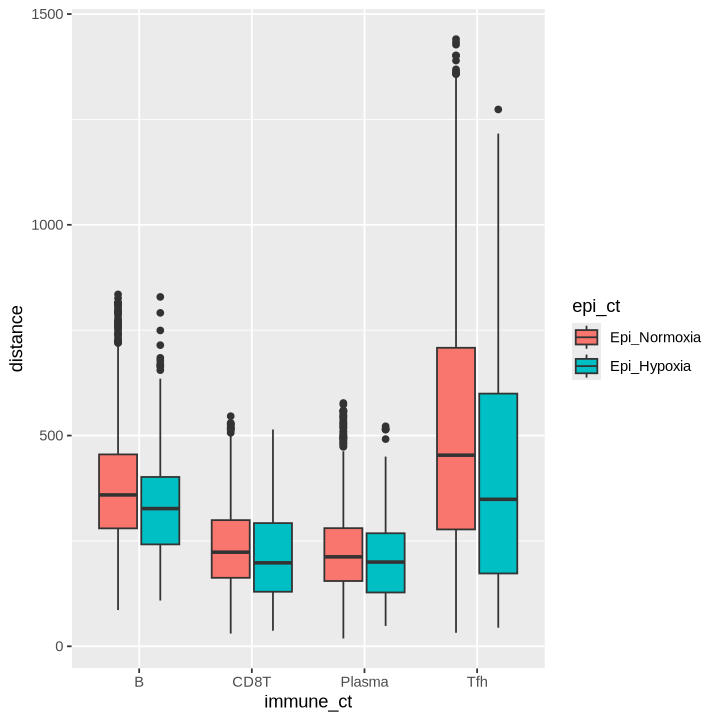

In [83]:
ggplot(distance_immune) + geom_boxplot(aes(x = immune_ct, y = distance, fill = epi_ct))

In [84]:
saveRDS(distance_immune,file = '~/HPV/res/spatial/distance_immune.rds')

In [85]:
mat = as.data.frame(spatial@assays$RNA@layers$counts)

In [86]:
rownames(mat) = rownames(spatial)

In [87]:
pdf('~/HPV/figure/figure4/spatial_ero1a.pdf',width = 3,height = 3)
suppressWarnings(ImageFeaturePlot(spatial[,mat['ERO1A',] >0 & mat['KRT5',] > 0 & mat['MKI67',] ==0], features = "ERO1A",size = 1.5))
dev.off()

png 
  2

In [88]:
pdf('~/HPV/figure/figure4/spatial_mki67.pdf',width = 3,height = 3)
suppressWarnings(ImageFeaturePlot(spatial[,mat['ERO1A',] == 0 & mat['KRT5',] > 0 & mat['MKI67',] > 0], features = "MKI67",size = 1.5))
dev.off()

png 
  2

In [89]:
pdf('~/HPV/figure/figure4/spatial_cd8a.pdf',width = 3,height = 3)
suppressWarnings(ImageFeaturePlot(spatial[,mat['CD8A',] > 0], features = "CD8A"))
dev.off()

png 
  2

In [90]:
pdf('~/HPV/figure/figure4/spatial_mzb1.pdf',width = 3,height = 3)
suppressWarnings(ImageFeaturePlot(spatial[,mat['MZB1',] > 0], features = "MZB1"))
dev.off()

png 
  2

In [91]:
pdf('~/HPV/figure/figure4/spatial_ms4a1.pdf',width = 3,height = 3)
suppressWarnings(ImageFeaturePlot(spatial[,mat['MS4A1',] > 0], features = "MS4A1"))
dev.off()

png 
  2

In [92]:
pdf('~/HPV/figure/figure4/spatial_cxcl13.pdf',width = 3,height = 3)
suppressWarnings(ImageFeaturePlot(spatial[,mat['CD4',] > 0 & mat['CXCL13',] > 0], features = "CXCL13"))
dev.off()

png 
  2

In [93]:
spatial$major = factor(spatial$major,levels = c('Epi_Normoxia','Epi_Hypoxia','Tfh','CD8T','B','Plasma'))

In [94]:
pdf('~/HPV/figure/figure4/spatial_marker_gene.pdf',width = 6,height = 3.5)
DotPlot(spatial,features = c('CD4','CXCL13','MS4A1','MZB1','KRT5','ERO1A','MKI67','CD8A')) + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))
dev.off()

Warning message:
“No layers found matching search pattern provided”
Warning message in FetchData.Assay5(object = object[[DefaultAssay(object = object)]], :
“data layer is not found and counts layer is used”


png 
  2